# NETWORK INTRUSION DETECTION SYSTEM USING MACHINE LEARNING

## IMPORTING LIBRARIES AND DATASETS

In [44]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import sparse
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Suppress warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline

In [45]:
train_data = pd.read_parquet('UNSW_NB15_testing-set.parquet')
test_data = pd.read_parquet('UNSW_NB15_training-set.parquet')

# Create a unified dataset
data = pd.concat([train_data,test_data])

## EXPLORATORY DATA ANALYSIS

In [47]:
data.shape # 36 columns, 257k data points

(257673, 36)

In [48]:
data.info() # Columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                257673 non-null  float32 
 1   proto              257673 non-null  object  
 2   service            257673 non-null  category
 3   state              257673 non-null  object  
 4   spkts              257673 non-null  int16   
 5   dpkts              257673 non-null  int16   
 6   sbytes             257673 non-null  int32   
 7   dbytes             257673 non-null  int32   
 8   rate               257673 non-null  float32 
 9   sload              257673 non-null  float32 
 10  dload              257673 non-null  float32 
 11  sloss              257673 non-null  int16   
 12  dloss              257673 non-null  int16   
 13  sinpkt             257673 non-null  float32 
 14  dinpkt             257673 non-null  float32 
 15  sjit               257673 non-null  floa

In [49]:
data.describe() # Statistics of numerical columns

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,91253.921875,7.060869e+07,6.582142e+05,4.889317,6.743691,912.300659,98.915451,5.419374e+03,582.251526,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,5.238271,4.032677,0.012819,0.012850,0.132005,0.014274,0.639077
std,5.974400,135.947152,111.985965,1.737739e+05,1.461993e+05,160376.890625,1.858389e+08,2.409641e+06,65.574953,53.702222,6931.191406,1094.939697,4.904773e+04,3926.478271,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092873,0.053828,0.045733,205.901118,254.041013,0.710593,4.962523e+04,8.160822,5.831515,0.116091,0.116421,0.681854,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,30.789276,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2955.664795,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,125000.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438858,2.787367e+03,119.712936,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1000000.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.492188,57739.238281,1.483831e+06,463199.250000,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,59.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000


In [50]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,Normal,0


In [51]:
# No outright NaN values 
data.isna().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [52]:
# Categorical columns
cols_cat = data.select_dtypes(['object', 'category']).columns
print(cols_cat)
# Numeric columns
cols_numeric = data._get_numeric_data().columns 

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [53]:
# Check the unique categories in all the categorical columns
data['proto'].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [54]:
data['attack_cat'].unique()

['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode', 'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic']
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [55]:
data['service'].unique() 

['-', 'ftp', 'smtp', 'snmp', 'http', ..., 'radius', 'pop3', 'dhcp', 'ssl', 'irc']
Length: 13
Categories (13, object): ['-', 'dhcp', 'dns', 'ftp', ..., 'smtp', 'snmp', 'ssh', 'ssl']

In [56]:
# Remove - category and replace with None
data['service'] = np.where(data['service'] == '-', 'None', data['service'])
data['service'].unique()

array(['None', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [57]:
data['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no',
       'ACC', 'CLO'], dtype=object)

In [58]:
if '-' in data.values:
    print('- exists somewhere')
else:
    print('No - exists in the dataframe after cleaning the service column')

No - exists in the dataframe after cleaning the service column


In [59]:
data.drop(['attack_cat'], axis=1, inplace=True)
cols_cat = cols_cat.drop(['attack_cat'])
cols_cat

Index(['proto', 'service', 'state'], dtype='object')

## DATA VISAULIZATION

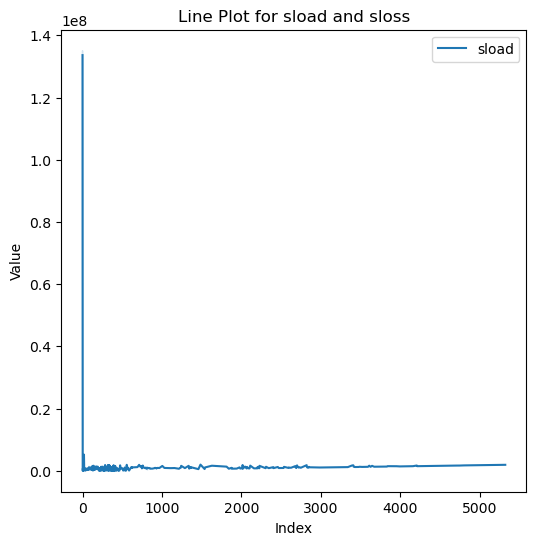

In [61]:
# Line plot for sload and sloss
plt.figure(figsize=(6,6))
sns.lineplot(data=data, x='sloss', y='sload', label='sload')

plt.title('Line Plot for sload and sloss')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

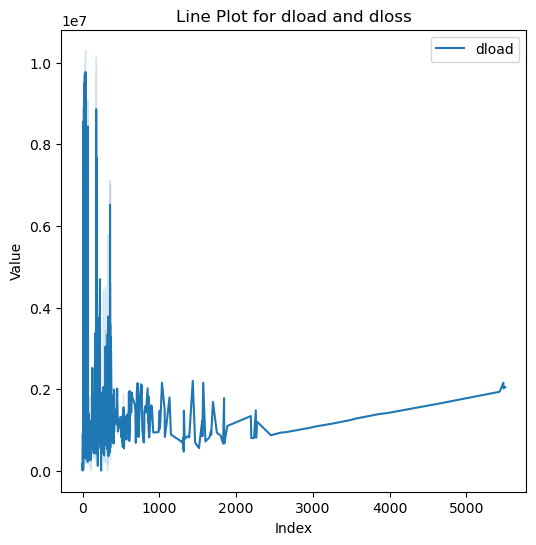

In [62]:
# Line plot for dload and dloss
plt.figure(figsize=(6, 6))
sns.lineplot(data=data, x='dloss', y='dload', label='dload')
plt.title('Line Plot for dload and dloss')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## DATA PREPROCESSING

In [64]:
# One hot encoding of categorical data
data_encoded = pd.get_dummies(data, columns=cols_cat)
data_encoded.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_None,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,0.649902,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [65]:
# Encoding all the categorical cols increased the number of columns from 39 to 199
data_encoded.shape

(257673, 189)

In [66]:
cols_numeric = list(cols_numeric)
# Remove the y label 
cols_numeric.remove('label')
# Convert all numbers to floating type
data_encoded[cols_numeric] = data_encoded[cols_numeric].astype('float') 

In [67]:
# Normalization of numeric columns
data_encoded[cols_numeric] = (data_encoded[cols_numeric] - np.min(data_encoded[cols_numeric])) / np.std(data_encoded[cols_numeric])
data_encoded.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_None,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.020333,0.044135,0.035719,0.001485,0.001176,0.000462,0.000076,0.003522,0.00000,0.000000,0.003510,0.007655,0.000615,0.003010,2.002085,0.454581,1.614909,2.004241,0.000000,0.000000,0.000000,0.208839,0.169264,0.0,0.0,0.122537,0.171482,0.000000,0.000000,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,0.108783,0.102981,0.339329,0.004224,0.287375,0.000489,0.000045,0.208746,0.03050,0.316561,0.007211,0.014106,0.001253,0.353111,2.002085,1.036623,2.256357,2.004241,0.000000,0.000000,0.000000,0.252549,4.353636,0.0,0.0,0.122537,0.171482,0.000000,0.000000,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

## BUILDING THE MODEL

In [69]:
from sklearn import model_selection, metrics
# Data, label split for models
X = data_encoded.drop('label', axis=1)
y = data_encoded['label']

In [70]:
# Fit the model and check its score
def fit(model, X, y, cv):
    trained_model = model.fit(X, y) #trained_model
    acc = round(trained_model.score(X, y) * 100, 2)
    y_pred = model_selection.cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
    
    precision = precision_score(y, y_pred, average='weighted')
    f1s = f1_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred, labels=trained_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=trained_model.classes_)
    disp.plot()
    plt.show()
    return y_pred, acc,  precision, f1s, recall, trained_model

## MODEL PREDICITON ACCURACY

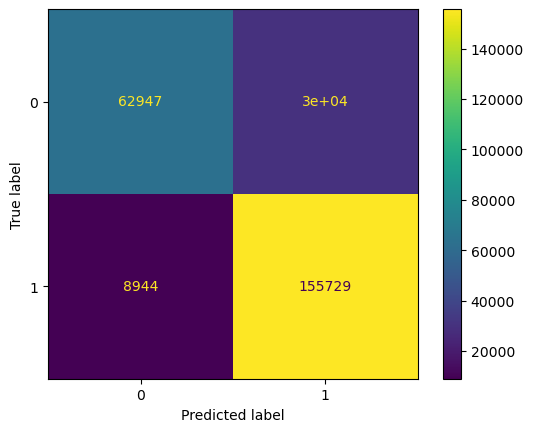

Accuracy: 86.25
Precision score: 0.8517171449111948
F1 Score: 0.8435276436461329
recall score: 0.8486570187796161
Execution time: 55.579647064208984


In [72]:
from sklearn.linear_model import LogisticRegression

import time
start_time = time.time()
pred_now, acc_lr, prec_lr, f1_lr, recall_lr, lr = fit(LogisticRegression(C=0.1), X, y, 10)
lr_time = (time.time() - start_time)

print("Accuracy: %s" % acc_lr)

print("Precision score: %s" %prec_lr)
print("F1 Score: %s" %f1_lr)
print("recall score: %s" % recall_lr)
print("Execution time: %s" % lr_time)

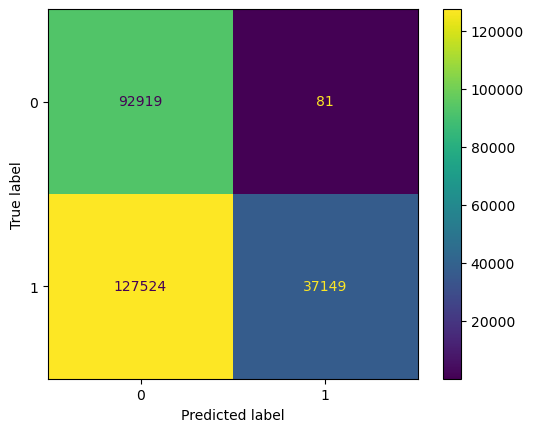

Accuracy: 50.5
Precision score: 0.7898196036661643
F1 Score: 0.44916148062352973
recall score: 0.5047793133157141
Execution time: 8.982846975326538


In [73]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
pred_now, acc_gnb,prec_gnb, f1_gnb, recall_gnb, gnb = fit(GaussianNB(), X, y, 5)
gnb_time = (time.time() - start_time)

print("Accuracy: %s" % acc_gnb)
print("Precision score: %s" %prec_gnb)
print("F1 Score: %s" %f1_gnb)
print("recall score: %s" % recall_gnb)
print("Execution time: %s" % gnb_time)


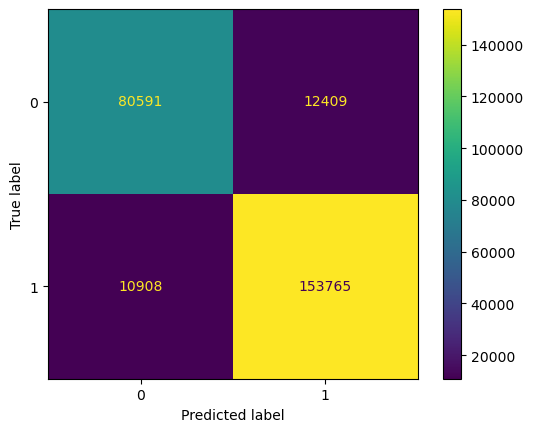

Accuracy: 99.02
Precision score: 0.9092498862575654
F1 Score: 0.90934651475285
recall score: 0.9095093393564712
Execution time: 28.640311241149902


In [74]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
pred_now, acc_dt,prec_dt, f1_dt, recall_dt, dt = fit(DecisionTreeClassifier(random_state = 1), X, y, 10)

dt_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dt)
print("Precision score: %s" %prec_dt)
print("F1 Score: %s" %f1_dt)
print("recall score: %s" % recall_dt)
print("Execution time: %s" % dt_time)


In [75]:
algorithm = ['Logisitc Regression','Gaussian Naive Bayes','Decision Tree Classifier']
compare = pd.DataFrame({'Algorithm' : algorithm, 'Accuracy':[acc_lr, acc_gnb, acc_dt]})

In [111]:
#Accuracy Comparision Table
compare = compare.sort_values(by='Accuracy', ascending = False)
compare = compare.reset_index(drop=True)
compare

,Algorithm,Accuracy
0,Decision Tree Classifier,99.02
1,Logisitc Regression,86.25
2,Gaussian Naive Bayes,50.50


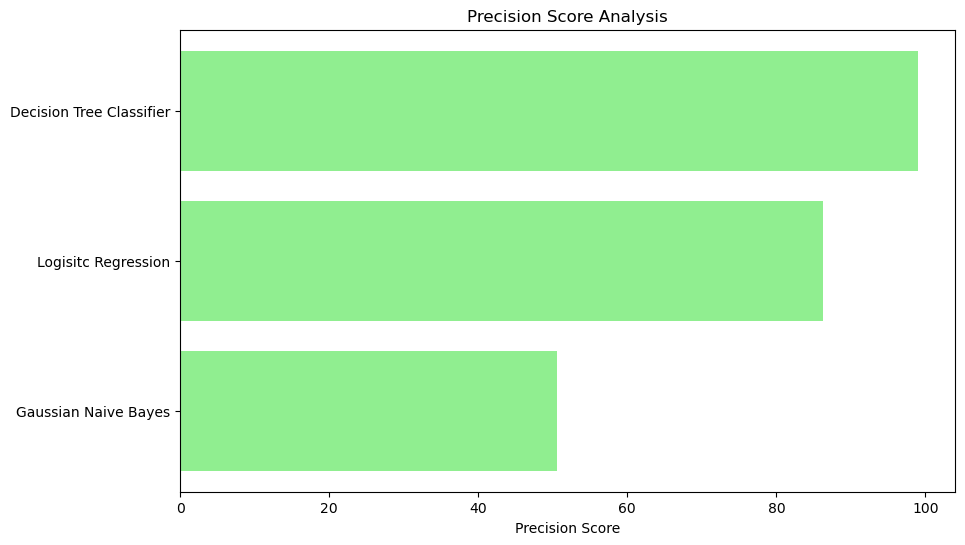

In [113]:
#Precision Score Analysis
plt.figure(figsize=(10, 6))
plt.barh(compare['Algorithm'], compare['Accuracy'], color='lightgreen')
plt.xlabel('Precision Score')
plt.title('Precision Score Analysis')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()

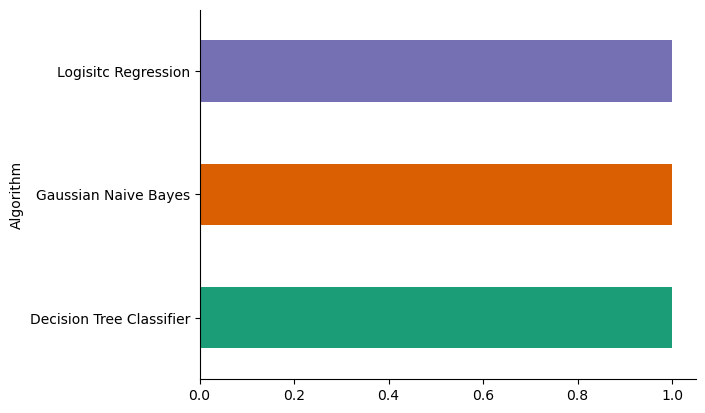

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
compare.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

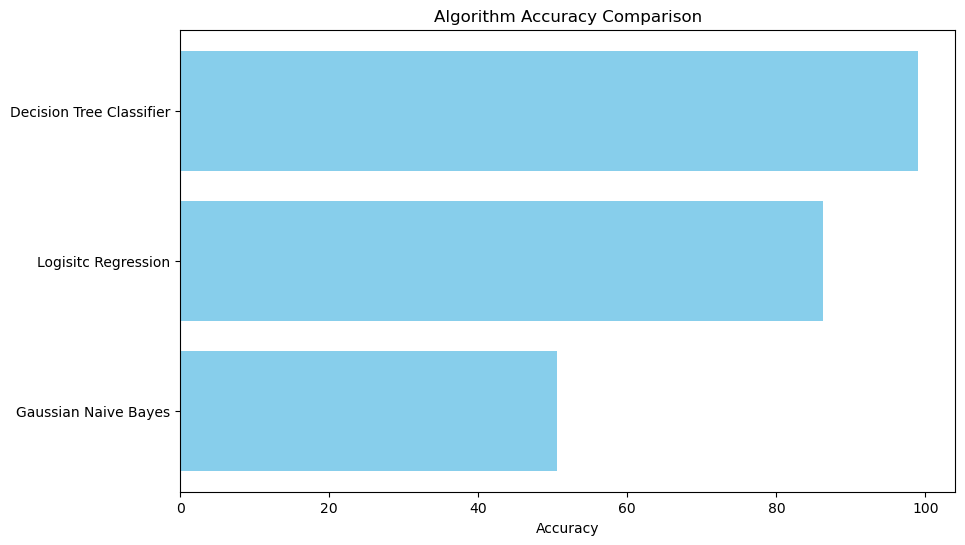

In [115]:
#Accuracy Comparsion Chart
plt.figure(figsize=(10, 6))
plt.barh(compare['Algorithm'], compare['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Algorithm Accuracy Comparison')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()